## CMS Dataset

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=3187020b4394d272d55254d268ca565e1f6fa4a0ded50e1398547ccdf2057e92
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
#accessing files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
  .appName('2.1. Google Cloud Storage (CSV) & Spark DataFrames') \
  .getOrCreate()

In [ ]:
# Reading the CSV file
PartDRawData = spark.read.csv('/content/drive/MyDrive/Big_data/Medicare_Part_D_Prescribers_by_Provider_and_Drug_Dataset_2024.csv', header=True, inferSchema=True)

# Print column names
print(PartDRawData.columns)


['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Prscrbr_City', 'Prscrbr_State_Abrvtn', 'Prscrbr_State_FIPS', 'Prscrbr_Type', 'Prscrbr_Type_Src', 'Brnd_Name', 'Gnrc_Name', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Day_Suply', 'Tot_Drug_Cst', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms', 'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply', 'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes']


In [ ]:
PartDRawData.printSchema()

root
 |-- Prscrbr_NPI: integer (nullable = true)
 |-- Prscrbr_Last_Org_Name: string (nullable = true)
 |-- Prscrbr_First_Name: string (nullable = true)
 |-- Prscrbr_City: string (nullable = true)
 |-- Prscrbr_State_Abrvtn: string (nullable = true)
 |-- Prscrbr_State_FIPS: string (nullable = true)
 |-- Prscrbr_Type: string (nullable = true)
 |-- Prscrbr_Type_Src: string (nullable = true)
 |-- Brnd_Name: string (nullable = true)
 |-- Gnrc_Name: string (nullable = true)
 |-- Tot_Clms: integer (nullable = true)
 |-- Tot_30day_Fills: double (nullable = true)
 |-- Tot_Day_Suply: integer (nullable = true)
 |-- Tot_Drug_Cst: double (nullable = true)
 |-- Tot_Benes: integer (nullable = true)
 |-- GE65_Sprsn_Flag: string (nullable = true)
 |-- GE65_Tot_Clms: integer (nullable = true)
 |-- GE65_Tot_30day_Fills: double (nullable = true)
 |-- GE65_Tot_Drug_Cst: double (nullable = true)
 |-- GE65_Tot_Day_Suply: integer (nullable = true)
 |-- GE65_Bene_Sprsn_Flag: string (nullable = true)
 |-- GE65_T

In [ ]:
df1=PartDRawData

In [ ]:
df1

DataFrame[Prscrbr_NPI: int, Prscrbr_Last_Org_Name: string, Prscrbr_First_Name: string, Prscrbr_City: string, Prscrbr_State_Abrvtn: string, Prscrbr_State_FIPS: string, Prscrbr_Type: string, Prscrbr_Type_Src: string, Brnd_Name: string, Gnrc_Name: string, Tot_Clms: int, Tot_30day_Fills: double, Tot_Day_Suply: int, Tot_Drug_Cst: double, Tot_Benes: int, GE65_Sprsn_Flag: string, GE65_Tot_Clms: int, GE65_Tot_30day_Fills: double, GE65_Tot_Drug_Cst: double, GE65_Tot_Day_Suply: int, GE65_Bene_Sprsn_Flag: string, GE65_Tot_Benes: int]


Displaying the number of rows and columns in Dataset 1

In [ ]:
num_rows = df1.count()
num_cols = len(df1.columns)
print("Number of rows: ", num_rows)
print("Number of columns: ", num_cols)

Number of rows:  25869521
Number of columns:  22


Selecting Essential columns from Dataframe

In [ ]:
from pyspark.sql.functions import col

partD_Drug_pd1 = df1.select(col("Prscrbr_NPI"), col("Prscrbr_City"), col("Prscrbr_State_Abrvtn"), \
                            col("Prscrbr_Last_Org_Name"), col("Prscrbr_First_Name"), \
                            col("Prscrbr_Type"), col("Brnd_Name"), col("Gnrc_Name"), \
                            col("Tot_Drug_Cst"), col("Tot_Clms"), col("Tot_Day_Suply"))

In [ ]:
partD_pd1 = partD_Drug_pd1

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import StringType


# Select the required columns
partD_Drug_df = partD_pd1.select(col('Prscrbr_NPI'), col('Brnd_Name'), col('Tot_Drug_Cst'), col('Tot_Clms'), col('Tot_Day_Suply'), col('Prscrbr_Type'))

# Cast the 'npi' column to 'StringType'
partD_Drug_df = partD_Drug_df.withColumn('Prscrbr_NPI', col('Prscrbr_NPI').cast(StringType()))

# Show the resulting DataFrame
partD_Drug_df.show()

+-----------+--------------------+------------+--------+-------------+-----------------+
|Prscrbr_NPI|           Brnd_Name|Tot_Drug_Cst|Tot_Clms|Tot_Day_Suply|     Prscrbr_Type|
+-----------+--------------------+------------+--------+-------------+-----------------+
| 1003000126| Amlodipine Besylate|      246.17|      19|         1230|Internal Medicine|
| 1003000126|Atorvastatin Calcium|      286.69|      11|          870|Internal Medicine|
| 1003000126|             Eliquis|     9503.53|      15|          508|Internal Medicine|
| 1003000126|Escitalopram Oxalate|      277.71|      16|          783|Internal Medicine|
| 1003000126| Hydrochlorothiazide|       68.18|      12|          542|Internal Medicine|
| 1003000126|        Levofloxacin|       81.74|      11|           72|Internal Medicine|
| 1003000126|Levothyroxine Sodium|      287.22|      11|          870|Internal Medicine|
| 1003000126|  Losartan Potassium|       189.6|      13|          990|Internal Medicine|
| 1003000126|Metoprol

In [ ]:
 # Select the required columns
partD_Spec_pd1 = partD_pd1.select(col('Prscrbr_NPI'), col('Prscrbr_Type'))
# Show the resulting DataFrame
partD_Spec_pd1.show()

+-----------+-----------------+
|Prscrbr_NPI|     Prscrbr_Type|
+-----------+-----------------+
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000126|Internal Medicine|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
| 1003000142|   Anesthesiology|
+-----------+-----------------+
only showing top 20 rows



In [ ]:
partD_Drug_df.head()

Row(Prscrbr_NPI='1003000126', Brnd_Name='Amlodipine Besylate', Tot_Drug_Cst=246.17, Tot_Clms=19, Tot_Day_Suply=1230, Prscrbr_Type='Internal Medicine')


Selecting the required columns and Showing the resulting DataFrame

In [ ]:
# Select the required columns
partD_pd0= partD_pd1.select(col('Prscrbr_NPI'), col('Prscrbr_City'), col('Prscrbr_State_Abrvtn'), \
                               col('Prscrbr_Last_Org_Name'), col('Prscrbr_First_Name'), \
                               col('Prscrbr_Type'))

# Show the resulting DataFrame
partD_pd0.show()

+-----------+------------+--------------------+---------------------+------------------+-----------------+
|Prscrbr_NPI|Prscrbr_City|Prscrbr_State_Abrvtn|Prscrbr_Last_Org_Name|Prscrbr_First_Name|     Prscrbr_Type|
+-----------+------------+--------------------+---------------------+------------------+-----------------+
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|                  MD|            Enkeshafi|           Ardalan|Internal Medicine|
| 1003000126|    Bethesda|           

Dropping Duplicates directly as dataset is large and will not affect analysis

In [ ]:
partD_catfpd = partD_pd0.drop_duplicates()

In [ ]:
partD_catfpd.head()

Row(Prscrbr_NPI=1003000126, Prscrbr_City='Bethesda', Prscrbr_State_Abrvtn='MD', Prscrbr_Last_Org_Name='Enkeshafi', Prscrbr_First_Name='Ardalan', Prscrbr_Type='Internal Medicine')

Renaming columns for readability and seamless future use

In [ ]:
# Define the rename dictionary
rename_dict = {'Prscrbr_First_Name':'first_name', 'Prscrbr_Last_Org_Name':'last_name', \
               'Prscrbr_City':'city', 'Prscrbr_State_Abrvtn':'state', 'Prscrbr_Type':'Speciality'}



# Rename the columns
for old_col, new_col in rename_dict.items():
    partD_catfpd = partD_catfpd.withColumnRenamed(old_col, new_col)

# Show the resulting DataFrame
partD_catfpd.show()

+-----------+-------------+-----+-------------------+------------+--------------------+
|Prscrbr_NPI|         city|state|          last_name|  first_name|          Speciality|
+-----------+-------------+-----+-------------------+------------+--------------------+
| 1003012014|   Providence|   RI|             Scarfo|Keith-Austin|      Anesthesiology|
| 1003019902|    Nashville|   TN|             Acosta|     Lealani|           Neurology|
| 1003023029|     New York|   NY|           Kasahara|    Takehiro|Oral Surgery (Den...|
| 1003055781|     Hartford|   CT|               Rice|       Jenny| Physician Assistant|
| 1003068628|    Evergreen|   CO|              Smith|       Katie| Physician Assistant|
| 1003078254| Wilkes Barre|   PA|          Rutkowski|        Paul|   Internal Medicine|
| 1003082215|Michigan City|   IN|              Thota|   Sharmilee|Obstetrics & Gyne...|
| 1003103367|   Middletown|   NY|            Banerji|      Dahlia|          Cardiology|
| 1003107400|     Syracuse|   NY

Creating graph to show number of doctors in each state

<ipython-input-18-b7e0d0318bd6>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")


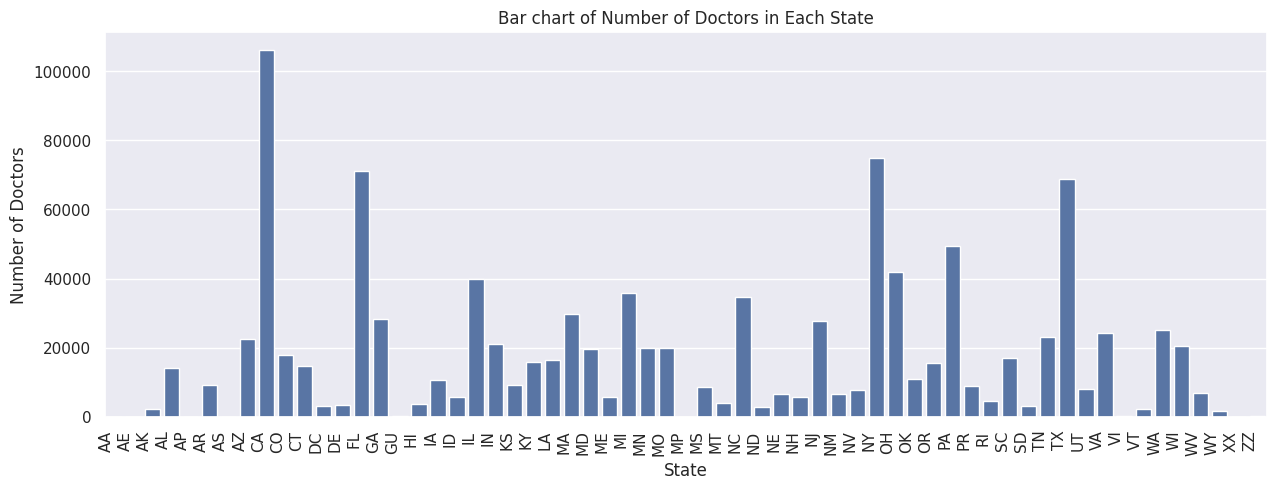

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of doctors in each state
state_counts = partD_catfpd.groupBy('state').count().orderBy('state')

# Create a bar chart of the state counts
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
ax = sns.barplot(x="state", y="count", data=state_counts.toPandas())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

plt.xlabel("State")
plt.ylabel("Number of Doctors")
plt.title("Bar chart of Number of Doctors in Each State")
plt.show()

In [ ]:
partD_catfpd.count()

1057566

In [ ]:
from pyspark.sql.functions import sum, mean, max

partD_agg=partD_Drug_df.groupBy('Prscrbr_NPI').agg(sum('Tot_Drug_Cst').alias('sum_tot_drug_cst'),
                              mean('Tot_Drug_Cst').alias('avg_tot_drug_cst'),
                              max('Tot_Drug_Cst').alias('max_tot_drug_cst'),
                              sum('Tot_Clms').alias('sum_tot_clms'),
                              mean('Tot_Clms').alias('avg_tot_clms'),
                              max('Tot_Clms').alias('max_tot_clms'),
                              sum('Tot_Day_Suply').alias('sum_tot_day_suply'),
                              mean('Tot_Day_Suply').alias('avg_tot_day_suply'),
                              max('Tot_Day_Suply').alias('max_tot_day_suply'))

In [ ]:
partD_agg.show()

+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+
|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|
+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+
| 1003017104| 5679.240000000001|1419.8100000000002|         4746.46|          65|             16.25|          29|             1651|            412.75|              665|
| 1003017906|285094.77999999997| 2639.766481481481|        37139.95|        4998| 46.27777777777778|         365|           325590| 3014.722222222222|            31608|
| 1003075516|444017.37000000005| 7047.894761904763|        88907.12|        7026|111.52380952380952|         882|           248272|3940.8253968253966|     

Scatterplot depicting Average Drug cose VS. Average total claims

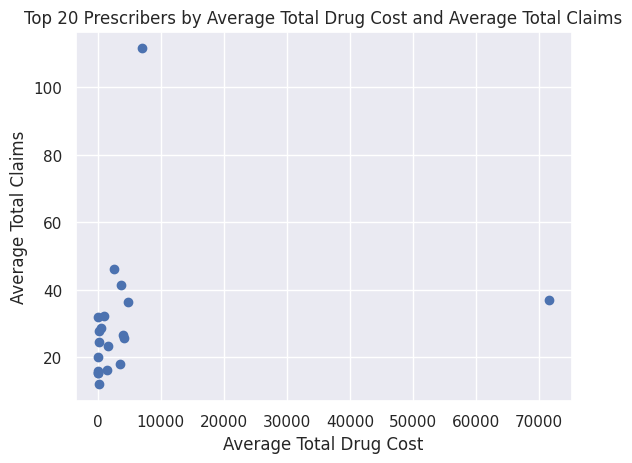

In [ ]:
# Extract the top 20 rows from the DataFrame
top_20_rows = partD_agg.limit(20).toPandas()


# Create a scatter plot to visualize the relationship between average total drug cost and average total claims
plt.scatter(x=top_20_rows['avg_tot_drug_cst'], y=top_20_rows['avg_tot_clms'])
plt.xlabel('Average Total Drug Cost')
plt.ylabel('Average Total Claims')
plt.title('Top 20 Prescribers by Average Total Drug Cost and Average Total Claims')
plt.show()

Joining dataset to Prscrbr_npi using left join

In [ ]:
from pyspark.sql.functions import col

partD_allpd = partD_agg.join(partD_catfpd, on='Prscrbr_NPI', how='left')

In [ ]:
partD_allpd.show()

+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+------------------+-----+--------------+----------+--------------------+
|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|              city|state|     last_name|first_name|          Speciality|
+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+------------------+-----+--------------+----------+--------------------+
| 1003017104| 5679.240000000001|1419.8100000000002|         4746.46|          65|             16.25|          29|             1651|            412.75|              665|Middleburg Heights|   OH|        Luther|   Charles|          Psychiatry|
| 1003017906|285094.77999999997| 263

In [ ]:
partD_allpd.head()

Row(Prscrbr_NPI='1003017104', sum_tot_drug_cst=5679.240000000001, avg_tot_drug_cst=1419.8100000000002, max_tot_drug_cst=4746.46, sum_tot_clms=65, avg_tot_clms=16.25, max_tot_clms=29, sum_tot_day_suply=1651, avg_tot_day_suply=412.75, max_tot_day_suply=665, city='Middleburg Heights', state='OH', last_name='Luther', first_name='Charles', Speciality='Psychiatry')

Dataset loading from Google data storage bucket. The entire datasets are incorporating three sections: General Payment, Research Payment and Physician Ownership Details. Key Features: The whole of general installment, Name of medication related the installments.

## FDA Dataset

In [ ]:
# Reading the CSV file
payment_rawdata = spark.read.csv('/content/drive/MyDrive/Big_data/OP_DTL_GNRL_PGYR2023_P06282024_06122024.csv', header=True, inferSchema=True)

# Print column names
print(payment_rawdata.columns)


['Change_Type', 'Covered_Recipient_Type', 'Teaching_Hospital_CCN', 'Teaching_Hospital_ID', 'Teaching_Hospital_Name', 'Covered_Recipient_Profile_ID', 'Covered_Recipient_NPI', 'Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name', 'Covered_Recipient_Name_Suffix', 'Recipient_Primary_Business_Street_Address_Line1', 'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City', 'Recipient_State', 'Recipient_Zip_Code', 'Recipient_Country', 'Recipient_Province', 'Recipient_Postal_Code', 'Covered_Recipient_Primary_Type_1', 'Covered_Recipient_Primary_Type_2', 'Covered_Recipient_Primary_Type_3', 'Covered_Recipient_Primary_Type_4', 'Covered_Recipient_Primary_Type_5', 'Covered_Recipient_Primary_Type_6', 'Covered_Recipient_Specialty_1', 'Covered_Recipient_Specialty_2', 'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4', 'Covered_Recipient_Specialty_5', 'Covered_Recipient_Specialty_6', 'Covered_Recipient_License_State_code1', 'Covered_Reci

In [ ]:
payment_rawdata.printSchema()

root
 |-- Change_Type: string (nullable = true)
 |-- Covered_Recipient_Type: string (nullable = true)
 |-- Teaching_Hospital_CCN: integer (nullable = true)
 |-- Teaching_Hospital_ID: integer (nullable = true)
 |-- Teaching_Hospital_Name: string (nullable = true)
 |-- Covered_Recipient_Profile_ID: integer (nullable = true)
 |-- Covered_Recipient_NPI: integer (nullable = true)
 |-- Covered_Recipient_First_Name: string (nullable = true)
 |-- Covered_Recipient_Middle_Name: string (nullable = true)
 |-- Covered_Recipient_Last_Name: string (nullable = true)
 |-- Covered_Recipient_Name_Suffix: string (nullable = true)
 |-- Recipient_Primary_Business_Street_Address_Line1: string (nullable = true)
 |-- Recipient_Primary_Business_Street_Address_Line2: string (nullable = true)
 |-- Recipient_City: string (nullable = true)
 |-- Recipient_State: string (nullable = true)
 |-- Recipient_Zip_Code: string (nullable = true)
 |-- Recipient_Country: string (nullable = true)
 |-- Recipient_Province: string

Selecting essential features from dataset, most importantly Total payemnt column

In [ ]:
from pyspark.sql.functions import col

payment_fpd = payment_rawdata.select(col('Covered_Recipient_First_Name'),
                                 col('Covered_Recipient_Last_Name'),
                                 col('Recipient_City'),
                                 col('Recipient_State'),
                                 col('Total_Amount_of_Payment_USDollars'))

In [ ]:
payment_fpd.head()

Row(Covered_Recipient_First_Name='SY', Covered_Recipient_Last_Name='LE', Recipient_City='IRVING', Recipient_State='TX', Total_Amount_of_Payment_USDollars='13.45')


Bar graph showing total Payment recieved by doctors Pie graph is showing distribution of payments by state

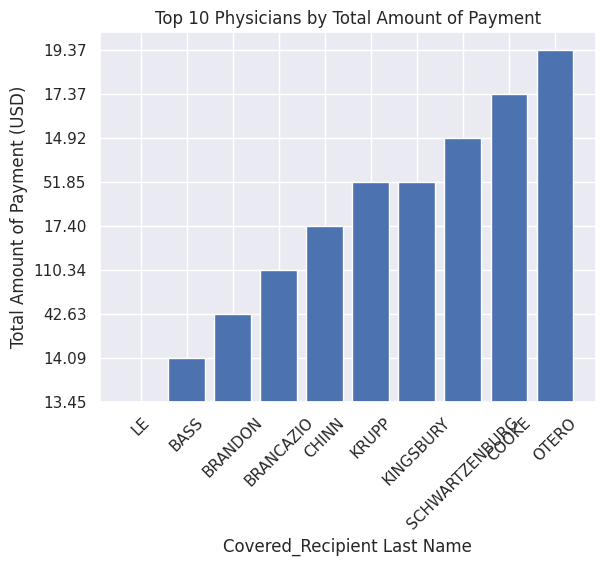

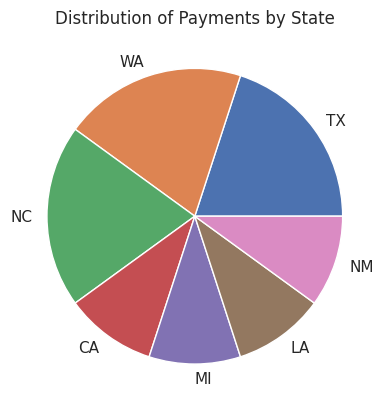

In [ ]:
import matplotlib.pyplot as plt

# Extract the top 10 rows from the DataFrame
top_10_rows = payment_fpd.limit(10).toPandas()

# Create a bar chart to visualize the total amount of payment for each physician
plt.bar(x=top_10_rows['Covered_Recipient_Last_Name'], height=top_10_rows['Total_Amount_of_Payment_USDollars'])
plt.xlabel('Covered_Recipient Last Name')
plt.ylabel('Total Amount of Payment (USD)')
plt.title('Top 10 Physicians by Total Amount of Payment')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()

# Create a pie chart to visualize the distribution of payments by state
state_counts = top_10_rows['Recipient_State'].value_counts()
plt.pie(x=state_counts.values, labels=state_counts.index)
plt.title('Distribution of Payments by State')
plt.show()

In [ ]:
payment_fpd.count()

14609233

Performing grouping and using agg() function to check the total payment sum in USD

In [ ]:
from pyspark.sql.functions import sum

payment_fpd1 = payment_fpd.groupby(['Covered_Recipient_First_Name', 'Covered_Recipient_Last_Name', 'Recipient_City', 'Recipient_State']) \
                         .agg(sum('Total_Amount_of_Payment_USDollars').alias('Total_Amount_of_Payment_USDollars_sum'))

In [ ]:
payment_fpd1.show()

+----------------------------+---------------------------+----------------+---------------+-------------------------------------+
|Covered_Recipient_First_Name|Covered_Recipient_Last_Name|  Recipient_City|Recipient_State|Total_Amount_of_Payment_USDollars_sum|
+----------------------------+---------------------------+----------------+---------------+-------------------------------------+
|                        MARC|                     LAVINE|    PHILADELPHIA|             PA|                    967.5699999999999|
|                      RANDAL|                       PHAM|        SAN JOSE|             CA|                              1684.15|
|                      Daniel|                      Cohen|  Salt Lake City|             UT|                                13.15|
|                     Kathryn|                       Luse|          Keller|             TX|                                14.48|
|                        John|                      Spero|            York|             ME

In [ ]:
from pyspark.sql.functions import col

rename_dict = {'Covered_Recipient_First_Name':'first_name', 'Covered_Recipient_Last_Name':'last_name', 'Recipient_City':'city', 'Recipient_State':'state', 'Total_Amount_of_Payment_USDollars_sum':'Total_Payment_Sum'}

payment_fpd1 = payment_fpd1.select([col(c).alias(rename_dict.get(c, c)) for c in payment_fpd1.columns])

In [ ]:
payment_fpd1.show()

+---------------+----------+----------------+-----+------------------+
|     first_name| last_name|            city|state| Total_Payment_Sum|
+---------------+----------+----------------+-----+------------------+
|           MARC|    LAVINE|    PHILADELPHIA|   PA| 967.5699999999999|
|         RANDAL|      PHAM|        SAN JOSE|   CA|           1684.15|
|         Daniel|     Cohen|  Salt Lake City|   UT|             13.15|
|        Kathryn|      Luse|          Keller|   TX|             14.48|
|           John|     Spero|            York|   ME|             14.82|
|      Pratyusha| Malireddy|     San Antonio|   TX|             14.29|
|          MARIA| HERNANDEZ|     GIBSON CITY|   IL|            190.95|
|           Anil|     Bajaj|         Chicago|   IL|             17.52|
|        BRADLEY|  BENGTSON|    GRAND RAPIDS|   MI|            5089.4|
|          BYUNG|       AHN|          UPLAND|   CA| 967.9300000000003|
|         KENDRA|     GRUBB|         ATLANTA|   GA|40149.899999999994|
|MUHAM


Sorting the dataset in descending order

In [ ]:
from pyspark.sql.functions import desc

payment_fpd2 = payment_fpd1.sort(desc('Total_Payment_Sum'))

In [ ]:
payment_fpd2.show()

+----------+----------+-------------+-----+--------------------+
|first_name| last_name|         city|state|   Total_Payment_Sum|
+----------+----------+-------------+-----+--------------------+
|      NULL|      NULL| PHILADELPHIA|   PA| 3.688471819499999E8|
|      NULL|      NULL|       Boston|   MA|      1.3680238771E8|
|   STEPHEN|  BURKHART|  SAN ANTONIO|   TX|       3.392202493E7|
|   WILLIAM|    BINDER|BEVERLY HILLS|   CA|       2.943435593E7|
|      NULL|      NULL|    CLEVELAND|   OH|2.3167657249999993E7|
|     KEVIN|     FOLEY|      MEMPHIS|   TN|1.7305259409999996E7|
|      NULL|      NULL|    ANN ARBOR|   MI|       1.628352726E7|
|      IVAN|    OSORIO|  KANSAS CITY|   KS|       1.606551551E7|
|      NULL|      NULL|       BOSTON|   MA|1.2641837680000002E7|
|    GEORGE|   MAXWELL|    NASHVILLE|   TN|       1.160032024E7|
|    ROBERT|     BOOTH| PHILADELPHIA|   PA|           8459144.4|
|      NULL|      NULL|     COLUMBIA|   MO|   8141734.809999998|
|      NEAL|ELATTRACHE|  


Joining the dataset using left join

In [ ]:
pay_partD_fpd = partD_allpd.join(payment_fpd2, ['last_name', 'first_name', 'city', 'state'], how='left')

In [ ]:
pay_partD_fpd.show()

+--------------+----------+--------------------+-----+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+-----------------+
|     last_name|first_name|                city|state|Prscrbr_NPI|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|          Speciality|Total_Payment_Sum|
+--------------+----------+--------------------+-----+-----------+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+-----------------+
|       Worthen|    Adrian|Tripler Army Medi...|   HI| 1003264417| 98375.26000000001| 4098.969166666667|        73454.38|         619|25.791666666666668|          69|            37691|1570.4583333333333|             5

In [ ]:
pay_partD_fpd.describe()

DataFrame[summary: string, last_name: string, first_name: string, city: string, state: string, Prscrbr_NPI: string, sum_tot_drug_cst: string, avg_tot_drug_cst: string, max_tot_drug_cst: string, sum_tot_clms: string, avg_tot_clms: string, max_tot_clms: string, sum_tot_day_suply: string, avg_tot_day_suply: string, max_tot_day_suply: string, Speciality: string, Total_Payment_Sum: string]

In [ ]:
# Convert "Total_Payment_Sum" to string explicitly (if not already)
pay_partD_fpd = pay_partD_fpd.withColumn("Total_Payment_Sum", pay_partD_fpd["Total_Payment_Sum"].cast("string"))

# Count the number of non-null values in "Total_Payment_Sum"
non_null_count = pay_partD_fpd.filter(pay_partD_fpd["Total_Payment_Sum"].isNotNull()).count()

# Display the count
print(f"Number of non-null values in 'Total_Payment_Sum': {non_null_count}")


Number of non-null values in 'Total_Payment_Sum': 50412


## LILE Dataset

Importing the dataset from google data storage. Information on dataset: This database contains a rundown of people and substances that are prohibited from taking an interest in governmentally financed social insurance programs (for example Medicare) because of past medicinal services extortion. We could treat the LEIE dataset as the semi-named information, on the grounds that LEIE is the fraudster-based objective however not a misrepresentation one.

In [ ]:
# Reading the CSV file
IELE_rawdata = spark.read.csv('/content/drive/MyDrive/Big_data/UPDATED.csv', header=True, inferSchema=True)

# Print column names
print(IELE_rawdata.columns)


['LASTNAME', 'FIRSTNAME', 'MIDNAME', 'BUSNAME', 'GENERAL', 'SPECIALTY', 'UPIN', 'NPI', 'DOB', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'EXCLTYPE', 'EXCLDATE', 'REINDATE', 'WAIVERDATE', 'WVRSTATE']


In [ ]:
IELE_rawdata.printSchema()

root
 |-- LASTNAME: string (nullable = true)
 |-- FIRSTNAME: string (nullable = true)
 |-- MIDNAME: string (nullable = true)
 |-- BUSNAME: string (nullable = true)
 |-- GENERAL: string (nullable = true)
 |-- SPECIALTY: string (nullable = true)
 |-- UPIN: string (nullable = true)
 |-- NPI: integer (nullable = true)
 |-- DOB: integer (nullable = true)
 |-- ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- STATE: string (nullable = true)
 |-- ZIP: string (nullable = true)
 |-- EXCLTYPE: string (nullable = true)
 |-- EXCLDATE: string (nullable = true)
 |-- REINDATE: integer (nullable = true)
 |-- WAIVERDATE: integer (nullable = true)
 |-- WVRSTATE: string (nullable = true)




Selecting the column which contains the npi of insurance abusers

In [ ]:
npifraud_pd0 = IELE_rawdata.select('NPI', 'EXCLTYPE')
npifraud_pd0.show()

+----------+--------+
|       NPI|EXCLTYPE|
+----------+--------+
|         0|  1128a1|
|         0|  1128b5|
|1972902351|  1128b8|
|         0|  1128a1|
|         0|  1128b7|
|         0|  1128b6|
|1922348218|  1128a1|
|         0|  1128b5|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128b5|
|         0|  1128a1|
|         0|  1128b8|
|         0|  1128a1|
|         0|  1128a1|
|         0|  1128b4|
|         0|  1128a1|
|         0|  1128b8|
+----------+--------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col


npifraud_pd1 = npifraud_pd0.filter(col('NPI') != 0)

In [ ]:
npifraud_pd1.show()

+----------+--------+
|       NPI|EXCLTYPE|
+----------+--------+
|1972902351|  1128b8|
|1922348218|  1128a1|
|1942476080|  1128b8|
|1275600959|  1128a1|
|1891731758|  1128b8|
|1265830335|  1128a1|
|1851631543|  1128b7|
|1902198435|  1128a1|
|1073916631|  1128b7|
|1437510278|  1128a1|
|1073682936|  1128b7|
|1902166028|  1128b8|
|1992906937|  1128b8|
|1104947944|  1128a1|
|1164669479|  1128a1|
|1043302250|  1128a1|
|1588167472|  1128a1|
|1801231436|  1128a1|
|1912011800|  1128b8|
|1780812768|  1128b7|
+----------+--------+
only showing top 20 rows



In [ ]:
rename_dict = {'NPI':'Prscrbr_NPI', 'EXCLTYPE':'is_fraud'}

npi_fraud_pd = npifraud_pd1.select([col(c).alias(rename_dict.get(c, c)) for c in npifraud_pd1.columns])

In [ ]:
npi_fraud_pd.show()

+-----------+--------+
|Prscrbr_NPI|is_fraud|
+-----------+--------+
| 1972902351|  1128b8|
| 1922348218|  1128a1|
| 1942476080|  1128b8|
| 1275600959|  1128a1|
| 1891731758|  1128b8|
| 1265830335|  1128a1|
| 1851631543|  1128b7|
| 1902198435|  1128a1|
| 1073916631|  1128b7|
| 1437510278|  1128a1|
| 1073682936|  1128b7|
| 1902166028|  1128b8|
| 1992906937|  1128b8|
| 1104947944|  1128a1|
| 1164669479|  1128a1|
| 1043302250|  1128a1|
| 1588167472|  1128a1|
| 1801231436|  1128a1|
| 1912011800|  1128b8|
| 1780812768|  1128b7|
+-----------+--------+
only showing top 20 rows



creating is_fraud and adding 1 to that column so in future can become binary

In [ ]:
from pyspark.sql.functions import lit

npi_fraud_pd = npi_fraud_pd.withColumn('is_fraud', lit(1))

In [ ]:
npi_fraud_pd.show()

+-----------+--------+
|Prscrbr_NPI|is_fraud|
+-----------+--------+
| 1972902351|       1|
| 1922348218|       1|
| 1942476080|       1|
| 1275600959|       1|
| 1891731758|       1|
| 1265830335|       1|
| 1851631543|       1|
| 1902198435|       1|
| 1073916631|       1|
| 1437510278|       1|
| 1073682936|       1|
| 1902166028|       1|
| 1992906937|       1|
| 1104947944|       1|
| 1164669479|       1|
| 1043302250|       1|
| 1588167472|       1|
| 1801231436|       1|
| 1912011800|       1|
| 1780812768|       1|
+-----------+--------+
only showing top 20 rows



In [ ]:
print(npi_fraud_pd.dtypes)

[('Prscrbr_NPI', 'int'), ('is_fraud', 'int')]


Joining the is_fraud column to the rest of the selected dataset

In [ ]:
Features_pd1 = pay_partD_fpd.join(npi_fraud_pd, ['Prscrbr_NPI'], how='left')
Features_pd1.show()

+-----------+--------------+----------+--------------------+-----+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+-----------------+--------+
|Prscrbr_NPI|     last_name|first_name|                city|state|  sum_tot_drug_cst|  avg_tot_drug_cst|max_tot_drug_cst|sum_tot_clms|      avg_tot_clms|max_tot_clms|sum_tot_day_suply| avg_tot_day_suply|max_tot_day_suply|          Speciality|Total_Payment_Sum|is_fraud|
+-----------+--------------+----------+--------------------+-----+------------------+------------------+----------------+------------+------------------+------------+-----------------+------------------+-----------------+--------------------+-----------------+--------+
| 1003264417|       Worthen|    Adrian|Tripler Army Medi...|   HI| 98375.26000000001| 4098.969166666667|        73454.38|         619|25.791666666666668|          69|            37691|1570.4

In [ ]:
Features_pd1.describe().show()

+-------+--------------------+-----------+-------------+-----------------+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+--------+
|summary|         Prscrbr_NPI|  last_name|   first_name|             city|  state|   sum_tot_drug_cst|  avg_tot_drug_cst|  max_tot_drug_cst|      sum_tot_clms|      avg_tot_clms|      max_tot_clms| sum_tot_day_suply| avg_tot_day_suply| max_tot_day_suply|   Speciality| Total_Payment_Sum|is_fraud|
+-------+--------------------+-----------+-------------+-----------------+-------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------+------------------+--------+
|  count|             1057567|    1057567|      1057567|          1057567|1057567|            1057567|       

FIlling all na values with 0

In [ ]:
Features_pd1 = Features_pd1.fillna(0)

In [ ]:
Features_pd1

DataFrame[Prscrbr_NPI: string, last_name: string, first_name: string, city: string, state: string, sum_tot_drug_cst: double, avg_tot_drug_cst: double, max_tot_drug_cst: double, sum_tot_clms: bigint, avg_tot_clms: double, max_tot_clms: int, sum_tot_day_suply: bigint, avg_tot_day_suply: double, max_tot_day_suply: int, Speciality: string, Total_Payment_Sum: string, is_fraud: int]

In [ ]:
columns_to_convert = ["Total_Payment_Sum"]

# Convert the specified columns to double
for column in columns_to_convert:
    Features_pd1 = Features_pd1.withColumn(column, col(column).cast("double"))

# Show the updated DataFrame schema to verify the changes
Features_pd1.printSchema()

root
 |-- Prscrbr_NPI: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sum_tot_drug_cst: double (nullable = false)
 |-- avg_tot_drug_cst: double (nullable = false)
 |-- max_tot_drug_cst: double (nullable = false)
 |-- sum_tot_clms: long (nullable = true)
 |-- avg_tot_clms: double (nullable = false)
 |-- max_tot_clms: integer (nullable = true)
 |-- sum_tot_day_suply: long (nullable = true)
 |-- avg_tot_day_suply: double (nullable = false)
 |-- max_tot_day_suply: integer (nullable = true)
 |-- Speciality: string (nullable = true)
 |-- Total_Payment_Sum: double (nullable = true)
 |-- is_fraud: integer (nullable = true)



In [ ]:
Features_pd1

DataFrame[Prscrbr_NPI: string, last_name: string, first_name: string, city: string, state: string, sum_tot_drug_cst: double, avg_tot_drug_cst: double, max_tot_drug_cst: double, sum_tot_clms: bigint, avg_tot_clms: double, max_tot_clms: int, sum_tot_day_suply: bigint, avg_tot_day_suply: double, max_tot_day_suply: int, Speciality: string, Total_Payment_Sum: double, is_fraud: int]

In [ ]:
# Saving the DataFrame to a CSV file
Features_pd1.coalesce(1).write.option("header", "true").csv('/content/drive/MyDrive/Big_data/Features_pd1_output.csv')

In [ ]:
import shutil
shutil.move('/content/drive/MyDrive/Big_data/Features_pd1_output.csv/part-00000-38081e18-3f41-4b30-abe2-4f752d9b4eb7-c000.csv', '/content/drive/MyDrive/Big_data/Features_pd2.csv')

'/content/drive/MyDrive/Big_data/Features_pd2.csv'

In [ ]:
# import pandas
# # Convert the PySpark DataFrame to a Pandas DataFrame
Features_pd1_pandas = Features_pd1.toPandas()

# # Save the Pandas DataFrame to a CSV file
Features_pd1_pandas.to_csv('/content/drive/MyDrive/Big_data/Features_pd1.csv', index=False)

Creating a bar graph to display the cities with the most fraud

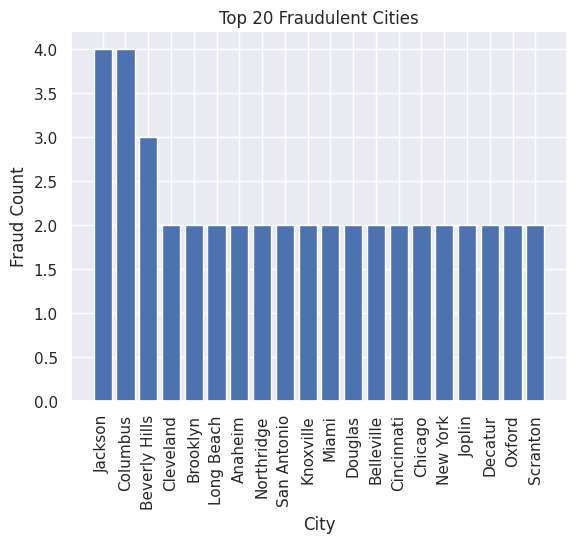

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

# Filter the fraud data where is_fraud = 1
fraud_cities = Features_pd1.filter(col("is_fraud") == 1).select("city")

# Count the number of fraud occurrences by city
fraud_counts = fraud_cities.groupBy("city").count().orderBy("count", ascending=False).limit(20)

# Convert the fraud counts to a Pandas dataframe for plotting
fraud_counts_pd = fraud_counts.toPandas()

# Create a bar plot
plt.bar(fraud_counts_pd["city"], fraud_counts_pd["count"])

# Add labels and title
plt.xlabel("City")
plt.ylabel("Fraud Count")
plt.title("Top 20 Fraudulent Cities")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
from pyspark.sql.functions import col

fraud_count = Features_pd1.filter(col('is_fraud') == 1).count()

In [ ]:
fraud_count

211

In [ ]:
FeaturesAll = Features_pd1

Scaling the features

In [ ]:
from pyspark.sql.functions import log10, col

FeaturesAll = FeaturesAll.withColumn('sum_tot_drug_cst', log10(col('sum_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('sum_tot_clms', log10(col('sum_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('sum_tot_day_suply', log10(col('sum_tot_day_suply') + 1.0))
FeaturesAll = FeaturesAll.withColumn('Total_Payment_Sum', log10(col('Total_Payment_Sum') + 1.0))

FeaturesAll = FeaturesAll.withColumn('avg_tot_drug_cst', log10(col('avg_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('avg_tot_clms', log10(col('avg_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('avg_tot_day_suply', log10(col('avg_tot_day_suply') + 1.0))

FeaturesAll = FeaturesAll.withColumn('max_tot_drug_cst', log10(col('max_tot_drug_cst') + 1.0))
FeaturesAll = FeaturesAll.withColumn('max_tot_clms', log10(col('max_tot_clms') + 1.0))
FeaturesAll = FeaturesAll.withColumn('max_tot_day_suply', log10(col('max_tot_day_suply') + 1.0))

FeaturesAll = FeaturesAll.withColumn('claim_max-mean', col('max_tot_clms') - col('avg_tot_clms'))
FeaturesAll = FeaturesAll.withColumn('supply_max-mean', col('max_tot_day_suply') - col('avg_tot_day_suply'))
FeaturesAll = FeaturesAll.withColumn('drug_max-mean', col('max_tot_drug_cst') - col('avg_tot_drug_cst'))

In [ ]:
FeaturesAll

DataFrame[Prscrbr_NPI: string, last_name: string, first_name: string, city: string, state: string, sum_tot_drug_cst: double, avg_tot_drug_cst: double, max_tot_drug_cst: double, sum_tot_clms: double, avg_tot_clms: double, max_tot_clms: double, sum_tot_day_suply: double, avg_tot_day_suply: double, max_tot_day_suply: double, Speciality: string, Total_Payment_Sum: double, is_fraud: int, claim_max-mean: double, supply_max-mean: double, drug_max-mean: double]

In [ ]:
from pyspark.sql.functions import col

FeaturesAll = FeaturesAll.withColumn("Prscrbr_NPI", col("Prscrbr_NPI").cast("string"))

Categorizing the features into categorical and numerical for easier analysis

In [ ]:
from pyspark.sql.types import StringType

categorical_features = ['Prscrbr_NPI', 'last_name', 'Speciality', 'first_name', 'city', 'state']

for feature in categorical_features:
    FeaturesAll = FeaturesAll.withColumn(feature, FeaturesAll[feature].cast(StringType()))

In [ ]:
numerical_features = ['sum_tot_drug_cst', 'avg_tot_drug_cst','Total_Payment_Sum',
       'max_tot_drug_cst', 'sum_tot_clms',
       'avg_tot_clms', 'max_tot_clms',
       'sum_tot_day_suply', 'avg_tot_day_suply', 'max_tot_day_suply',
    'claim_max-mean','supply_max-mean', 'drug_max-mean']

assigning target name to is_fraud column

In [ ]:
target = ['is_fraud']

In [ ]:
allvars = categorical_features + numerical_features + target

In [ ]:
y = FeaturesAll.select("is_fraud").rdd.flatMap(lambda x: x).collect()
X = FeaturesAll.select([col(c) for c in allvars if c != 'is_fraud'])

Using 100% of the data (Scaling out) to train and test into 80:20 ratio

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.ml.tuning import TrainValidationSplit

# select the numerical columns from the original dataframe
numerical_features = ['sum_tot_drug_cst', 'avg_tot_drug_cst','Total_Payment_Sum',
       'max_tot_drug_cst', 'sum_tot_clms',
       'avg_tot_clms', 'max_tot_clms',
       'sum_tot_day_suply', 'avg_tot_day_suply', 'max_tot_day_suply',
    'claim_max-mean','supply_max-mean', 'drug_max-mean']
X = FeaturesAll.select(numerical_features)

# convert numerical columns to double type
for feature in numerical_features:
    X = X.withColumn(feature, col(feature).cast(DoubleType()))

# combine features into a single vector column
vectorAssembler = VectorAssembler(inputCols=X.columns, outputCol="features_vec")
X = vectorAssembler.transform(X)

# split the data into train and validation sets
train, test = X.randomSplit([0.8, 0.2], seed=0)

# select the correct columns for input and output
X_train = train.select(X.columns)
X_valid = test.select(X.columns)
y_train = train.select("Total_Payment_Sum")
y_valid = test.select("Total_Payment_Sum")

In [ ]:
# print(X_train.count())
# print(len(X_train.columns))
# print(X_valid.count())
# print(len(X_valid.columns))

Handling the null values

In [ ]:
from pyspark.sql.functions import col

# fill null values in numerical columns with 0
for feature in numerical_features:
    X_train = X_train.withColumn(feature, col(feature).cast("double"))
    X_valid = X_valid.withColumn(feature, col(feature).cast("double"))
    X_train = X_train.na.fill(0, [feature])
    X_valid = X_valid.na.fill(0, [feature])

# fill null values in categorical columns with 'NA'
for feature in categorical_features:
    if feature in X_train.columns:
        X_train = X_train.na.fill('NA', [feature])
    if feature in X_valid.columns:
        X_valid = X_valid.na.fill('NA', [feature])

In [ ]:
from pyspark.sql.functions import col

X_train.select([col(col_name).cast("double").alias(col_name) for col_name in numerical_features]).dtypes

[('sum_tot_drug_cst', 'double'),
 ('avg_tot_drug_cst', 'double'),
 ('Total_Payment_Sum', 'double'),
 ('max_tot_drug_cst', 'double'),
 ('sum_tot_clms', 'double'),
 ('avg_tot_clms', 'double'),
 ('max_tot_clms', 'double'),
 ('sum_tot_day_suply', 'double'),
 ('avg_tot_day_suply', 'double'),
 ('max_tot_day_suply', 'double'),
 ('claim_max-mean', 'double'),
 ('supply_max-mean', 'double'),
 ('drug_max-mean', 'double')]

In [ ]:
from pyspark.sql.functions import rand

df_len = FeaturesAll.count()
train_len = int(df_len * 0.8)

df_train = FeaturesAll.orderBy(rand()).limit(train_len)
df_valid = FeaturesAll.orderBy(rand()).exceptAll(df_train)

print(df_train.count())
print(df_valid.count())


846053
211514


In [ ]:
df_train.printSchema()

root
 |-- Prscrbr_NPI: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- sum_tot_drug_cst: double (nullable = true)
 |-- avg_tot_drug_cst: double (nullable = true)
 |-- max_tot_drug_cst: double (nullable = true)
 |-- sum_tot_clms: double (nullable = true)
 |-- avg_tot_clms: double (nullable = true)
 |-- max_tot_clms: double (nullable = true)
 |-- sum_tot_day_suply: double (nullable = true)
 |-- avg_tot_day_suply: double (nullable = true)
 |-- max_tot_day_suply: double (nullable = true)
 |-- Speciality: string (nullable = true)
 |-- Total_Payment_Sum: double (nullable = true)
 |-- is_fraud: integer (nullable = true)
 |-- claim_max-mean: double (nullable = true)
 |-- supply_max-mean: double (nullable = true)
 |-- drug_max-mean: double (nullable = true)



In [ ]:
partD_Drug_df

DataFrame[Prscrbr_NPI: string, Brnd_Name: string, Tot_Drug_Cst: double, Tot_Clms: int, Tot_Day_Suply: int, Prscrbr_Type: string]

In [ ]:
# Saving the DataFrame to a CSV file
partD_Drug_df.coalesce(1).write.option("header", "true").csv('/content/drive/MyDrive/Big_data/partD_Drug_df.csv')

In [ ]:
import shutil
shutil.move('/content/drive/MyDrive/Big_data/partD_Drug_df.csv/part-00000-099e70ca-50c7-45b3-b484-4fe4c612bdc1-c000.csv', '/content/drive/MyDrive/Big_data/partD_Drugdf.csv')

'/content/drive/MyDrive/Big_data/partD_Drugdf.csv'

In [ ]:
from pyspark.sql.functions import col

partD_drug_train = partD_Drug_df.join(df_train.select('Prscrbr_NPI', 'is_fraud'), on=['Prscrbr_NPI'], how='inner')
partD_drug_all = partD_Drug_df.join(FeaturesAll.select('Prscrbr_NPI', 'is_fraud'), on=['Prscrbr_NPI'], how='inner')

In [ ]:
print(partD_drug_train.filter(col("is_fraud") == 1).count())

5706


In [ ]:
# Total records in train set
print("Total records in train set : ")
print(partD_drug_train.count())

# Total Fraud in train set
print("Total Fraud in train set : ")
print(partD_drug_train.filter("is_fraud == 1").count())

# Show DataFrame
partD_drug_train.show()

Total records in train set : 
20691113
Total Fraud in train set : 
5706
+-----------+--------------------+------------+--------+-------------+---------------+--------+
|Prscrbr_NPI|           Brnd_Name|Tot_Drug_Cst|Tot_Clms|Tot_Day_Suply|   Prscrbr_Type|is_fraud|
+-----------+--------------------+------------+--------+-------------+---------------+--------+
| 1003003856|Albuterol Sulfate...|      670.16|      18|          435|Family Practice|       0|
| 1003003856|         Allopurinol|      427.98|      45|         4050|Family Practice|       0|
| 1003003856|          Alprazolam|      113.53|      45|         1200|Family Practice|       0|
| 1003003856| Amlodipine Besylate|     1171.43|     162|        14430|Family Practice|       0|
| 1003003856|Amoxicillin-Clavu...|      268.03|      30|          276|Family Practice|       0|
| 1003003856|            Atenolol|      200.69|      37|         3330|Family Practice|       0|
| 1003003856|Atorvastatin Calcium|     3685.48|     364|        

Using the next line to scale down the size of database and use it by filter the 'fraction' parameter. ANalysis done on 100%, 50%, 20% and 5%

In [ ]:
partD_drug_train_20= partD_drug_train.sample(fraction=0.05, seed=42)

Using vector assembler and splitting the data train and test data

In [ ]:
feature_cols = ['Tot_Drug_Cst', 'Tot_Clms', 'Tot_Day_Suply']

# Create a vector assembler to assemble the features into a vector
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Apply the vector assembler to the training data
train_data = assembler.transform(partD_drug_train_20).select("features", "is_fraud")

# Split the data into training and test sets
train_set, test_set = train_data.randomSplit([0.7, 0.3], seed=12345)

In [ ]:
num_train_data = train_set.count()
print("Number of data in train_set:", num_train_data)

Number of data in train_set: 723682


In [ ]:
# Total records in train set
print("Number of data in train_set:", num_train_data)

num_test_data = test_set.count()
print("Number of data in test_set:", num_test_data)

# Total Fraud in train set
print("Total Fraud in train set : ")
print(train_set.filter("is_fraud == 1").count())


Number of data in train_set: 723682
Number of data in test_set: 310806
Total Fraud in train set : 
194


## Models

In [ ]:
 import time

### Logistic Regression

Time to train logistic regression model: 1238.0802 seconds
Time to make predictions on test set: 0.2751 seconds
Accuracy: 0.5275
F1 Score: 0.9997
Precision: 0.9995
Recall: 0.9998
Confusion Matrix: 
[[3.11198e+05 0.00000e+00]
 [7.10000e+01 0.00000e+00]]
Area Under ROC: 0.5098


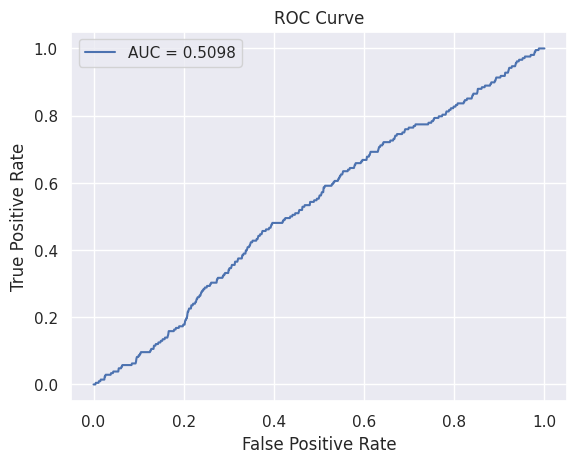

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import time
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Create a logistic regression model with default parameters
lr = LogisticRegression(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
lr_model = lr.fit(train_set)
end = time.time()
print(f"Time to train logistic regression model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = lr_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate the model using precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)

# Evaluate the model using recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)

# Cast 'prediction' and 'is_fraud' columns to double for compatibility with MulticlassMetrics
predictions_cast = predictions.withColumn('prediction', F.col('prediction').cast('double'))\
                              .withColumn('is_fraud', F.col('is_fraud').cast('double'))

# Confusion Matrix
prediction_and_labels = predictions_cast.select('prediction', 'is_fraud').rdd
metrics = MulticlassMetrics(prediction_and_labels)

confusion_matrix = metrics.confusionMatrix().toArray()

# ROC Curve
roc_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
roc_auc = roc_evaluator.evaluate(predictions)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Area Under ROC: {roc_auc:.4f}")

# Plot ROC curve
roc = lr_model.summary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### Naive Bayes on data

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import time
import matplotlib.pyplot as plt

# Create a Naive Bayes model with default parameters
nb = NaiveBayes(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
nb_model = nb.fit(train_set)
end = time.time()
print(f"Time to train Naive Bayes model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = nb_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics (accuracy via areaUnderROC)
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate the model using precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)

# Evaluate the model using recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)

# Confusion Matrix
prediction_and_labels = predictions.select('prediction', 'is_fraud').rdd
metrics = MulticlassMetrics(prediction_and_labels)

confusion_matrix = metrics.confusionMatrix().toArray()

# ROC Curve
roc_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
roc_auc = roc_evaluator.evaluate(predictions)

# Print metrics
print(f"Accuracy (AUC): {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Area Under ROC: {roc_auc:.4f}")

# Plot ROC curve
roc = nb_model.summary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### Gradient Boosting Trees Classifier

In [ ]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import time
import matplotlib.pyplot as plt

# Create a GBTClassifier model with default parameters
gbt = GBTClassifier(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
gbt_model = gbt.fit(train_set)
end = time.time()
print(f"Time to train GBTClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = gbt_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics (Accuracy via AUC)
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate the model using precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)

# Evaluate the model using recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)

# Confusion Matrix
prediction_and_labels = predictions.select('prediction', 'is_fraud').rdd
metrics = MulticlassMetrics(prediction_and_labels)

confusion_matrix = metrics.confusionMatrix().toArray()

# ROC Curve
roc_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
roc_auc = roc_evaluator.evaluate(predictions)

# Print metrics
print(f"Accuracy (AUC): {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Area Under ROC: {roc_auc:.4f}")

# Plot ROC curve
roc = gbt_model.summary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### Random Forest Classifier

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import time
import matplotlib.pyplot as plt

# Create a RandomForestClassifier model with default parameters
rf = RandomForestClassifier(featuresCol='features', labelCol='is_fraud')

# Train the model using the training set
start = time.time()
rf_model = rf.fit(train_set)
end = time.time()
print(f"Time to train RandomForestClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = rf_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics (Accuracy via AUC)
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate the model using precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)

# Evaluate the model using recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)

# Confusion Matrix
prediction_and_labels = predictions.select('prediction', 'is_fraud').rdd
metrics = MulticlassMetrics(prediction_and_labels)

confusion_matrix = metrics.confusionMatrix().toArray()

# ROC Curve
roc_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
roc_auc = roc_evaluator.evaluate(predictions)

# Print metrics
print(f"Accuracy (AUC): {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Area Under ROC: {roc_auc:.4f}")

# Plot ROC curve
roc = rf_model.summary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


### Decision Tree Classifier

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import time
import matplotlib.pyplot as plt

# Split the data into training and test sets
start = time.time()
train_set, test_set = train_data.randomSplit([0.7, 0.3], seed=12345)
end = time.time()
print(f"Time to split data into training and test sets: {end - start:.4f} seconds")

# Create a DecisionTreeClassifier model
dt = DecisionTreeClassifier(
    featuresCol='features',
    labelCol='is_fraud',
    maxDepth=5,
    maxBins=32,
    minInstancesPerNode=1,
    impurity='gini'
)

# Train the model using the training set
start = time.time()
dt_model = dt.fit(train_set)
end = time.time()
print(f"Time to train DecisionTreeClassifier model: {end - start:.4f} seconds")

# Make predictions on the test set
start = time.time()
predictions = dt_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Evaluate the model using binary classification metrics (accuracy via AUC)
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
accuracy = binary_evaluator.evaluate(predictions)

# Evaluate the model using F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate the model using precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedPrecision')
precision = precision_evaluator.evaluate(predictions)

# Evaluate the model using recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='weightedRecall')
recall = recall_evaluator.evaluate(predictions)

# Confusion Matrix
prediction_and_labels = predictions.select('prediction', 'is_fraud').rdd
metrics = MulticlassMetrics(prediction_and_labels)

confusion_matrix = metrics.confusionMatrix().toArray()

# ROC Curve
roc_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')
roc_auc = roc_evaluator.evaluate(predictions)

# Print metrics
print(f"Accuracy (AUC): {accuracy:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Area Under ROC: {roc_auc:.4f}")

# Plot ROC curve
roc = dt_model.summary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label=f'AUC = {roc_auc:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


Creating a graph to display the effect of F1 score on Scaling

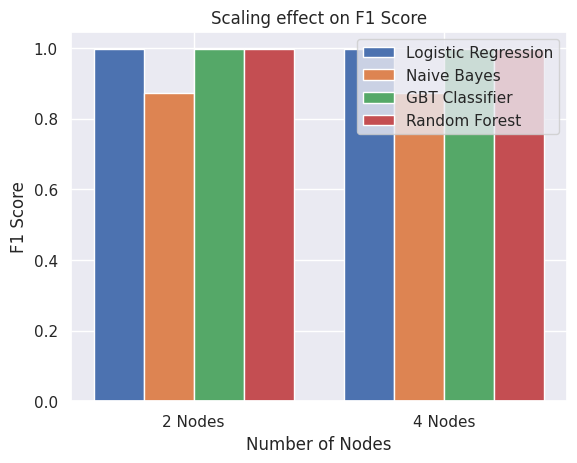

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each bar
logistic_regression = [0.9965, 0.9964]
naive_bayes = [0.8734, 0.8725]
gbt_classifier = [0.9965, 0.9965]
random_forest = [0.9966, 0.9965]

# Set the width of each bar
bar_width = 0.2

# Create an array to position the bars on the x-axis
bar_positions = np.arange(len(x))

# Create the bar plots for each line
plt.bar(bar_positions - 1.5*bar_width, logistic_regression, width=bar_width, label='Logistic Regression')
plt.bar(bar_positions - 0.5*bar_width, naive_bayes, width=bar_width, label='Naive Bayes')
plt.bar(bar_positions + 0.5*bar_width, gbt_classifier, width=bar_width, label='GBT Classifier')
plt.bar(bar_positions + 1.5*bar_width, random_forest, width=bar_width, label='Random Forest')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('F1 Score')
plt.title('Scaling effect on F1 Score')

# Add tick labels to the x-axis
plt.xticks(bar_positions, x)

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

Creating a graph to display the effect of Accuracy on Scaling

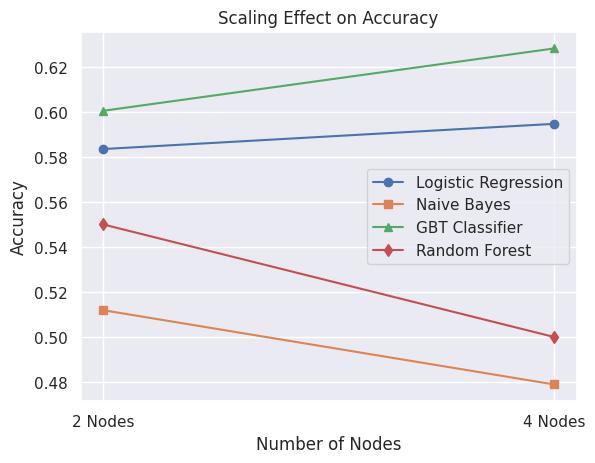

In [ ]:
# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each line
logistic_regression = [0.5835, 0.5947]
naive_bayes = [0.5119, 0.4789]
gbt_classifier = [0.6005, 0.6282]
random_forest = [0.5500, 0.5000]

# Plot the lines on the graph with markers for each data point
plt.plot(x, logistic_regression, marker='o', label='Logistic Regression')
plt.plot(x, naive_bayes, marker='s', label='Naive Bayes')
plt.plot(x, gbt_classifier, marker='^', label='GBT Classifier')
plt.plot(x, random_forest, marker='d', label='Random Forest')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Accuracy')
plt.title('Scaling Effect on Accuracy')

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

Creating a graph to display the effect of Time on Scaling and using various algorithms

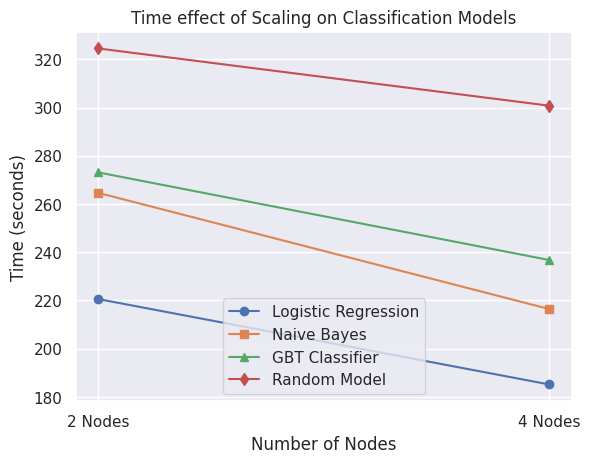

In [ ]:
# Define the x-axis points
x = ['2 Nodes', '4 Nodes']

# Define the y-axis values for each line
logistic_regression = [220.5698, 185.1697]
naive_bayes = [264.6157, 216.4411]
gbt_classifier = [273.0909, 236.7622]
random_model = [324.4908, 300.7622]

# Plot the lines on the graph with markers for each data point
plt.plot(x, logistic_regression, marker='o', label='Logistic Regression')
plt.plot(x, naive_bayes, marker='s', label='Naive Bayes')
plt.plot(x, gbt_classifier, marker='^', label='GBT Classifier')
plt.plot(x, random_model, marker='d', label='Random Model')

# Add labels and title to the graph
plt.xlabel('Number of Nodes')
plt.ylabel('Time (seconds)')
plt.title('Time effect of Scaling on Classification Models')

# Add a legend to the graph
plt.legend()

# Display the graph
plt.show()

## Grid Search for RF

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import time
from pyspark.mllib.evaluation import MulticlassMetrics

# Create a RandomForestClassifier model
rf = RandomForestClassifier(featuresCol='features', labelCol='is_fraud')

# Build a parameter grid for hyperparameter tuning
paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [10, 20, 50]) \
    .addGrid(rf.maxDepth, [5, 10, 20]) \
    .addGrid(rf.impurity, ['gini', 'entropy']) \
    .build()

# Define a binary classification evaluator
binary_evaluator = BinaryClassificationEvaluator(labelCol='is_fraud', metricName='areaUnderROC')

# Set up cross-validation with the random forest model and parameter grid
crossval = CrossValidator(estimator=rf,
                          estimatorParamMaps=paramGrid,
                          evaluator=binary_evaluator,
                          numFolds=5)  # 5-fold cross-validation

# Train the model using cross-validation
start = time.time()
cv_model = crossval.fit(train_set)
end = time.time()
print(f"Time to train RandomForestClassifier model with grid search: {end - start:.4f} seconds")

# Get the best model
best_rf_model = cv_model.bestModel

# Make predictions on the test set
start = time.time()
predictions = best_rf_model.transform(test_set)
end = time.time()
print(f"Time to make predictions on test set: {end - start:.4f} seconds")

# Binary evaluator for accuracy
accuracy = binary_evaluator.evaluate(predictions)

# Multiclass evaluator for F1 score
multi_evaluator = MulticlassClassificationEvaluator(labelCol='is_fraud', metricName='f1')
f1_score = multi_evaluator.evaluate(predictions)

# Evaluate Precision, Recall, and F1-Score using MulticlassMetrics
prediction_and_labels = predictions.select("prediction", "is_fraud").rdd
metrics = MulticlassMetrics(prediction_and_labels)

precision = metrics.precision(1.0)  # Precision for class 1 (fraud)
recall = metrics.recall(1.0)        # Recall for class 1 (fraud)

# Print the evaluation metrics
print(f"Best Model Accuracy: {accuracy:.4f}")
print(f"Best Model Precision: {precision:.4f}")
print(f"Best Model Recall: {recall:.4f}")
print(f"Best Model F1 Score: {f1_score:.4f}")

# Get the ROC curve
roc_curve = predictions.select("probability", "is_fraud")
roc_auc = binary_evaluator.evaluate(predictions, {binary_evaluator.metricName: "areaUnderROC"})
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion Matrix
conf_matrix = metrics.confusionMatrix()
print(f"Confusion Matrix:\n{conf_matrix.toArray()}")
